# Introduction à knn
---
Le but de ce TP est de mieux appréhender l'apprentissage via une méthode type 'plus proches voisins'. 
--- 

## Conseils
- Pour chaque question, essayer d'écrire des fonctions plutôt que des scripts
- Eviter d'avoir deux fonctions qui portent le même nom (redéfinition de la fonction), préférer ajouter un paramètre de choix

---
# Construction d'un jeu de données simple
---
Dans ce TP, on n'utili pas un jeu de données existant, mais on en fabrique un, d'un niveau de complexité adéquat, et dont on connait en réalité parfaitement la loi.

## Ecrire une fonction ```separation```
- Entrée :  un couple (x, y) de flottants
- Sortie : 'A' si y<f(x)  et 'B' sinon, où $f(x) = \frac{x}{3}*\left(2+\cos\left(\frac{x}{6}\right)\right)$

***Chargement de toutes les bibliotheque***

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing



In [2]:
def f_x(x):
    return (x/3)*(2+(np.cos(x/6)))

def separation(x,y):
    if (y<f_x(x)):
        return 'A'
    else :return 'B'
    
display(f_x(5))
separation (5,8)

4.454020406805094

'B'

## Ecrire une fonction ```donneesSimples``` 
- Entrée : 
    - ```N``` un entier 
    - ```f``` une fonction prenant en entrée deux flottants
- Sortie : un dataframe de ```N``` échantillons de 3 attributs :
  - ```abscisse``` : tiré en aléatoire uniforme dans [0 ; 100], flottant
  - ```ordonnee``` : tiré en aléatoire uniforme dans [0 ; 100], flottant
  - ```classe = f(abscisse, ordonnée)```
- vous *devez* utiliser un apply de la fonction ```séparation```

In [3]:
#def donneeSimple (  N, fonction(x,y)):
  #  return pd.DataFrame({'abscisse':[np.random[0,100],'ordonnee':[np.random[0,100]]]})
    
 #pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})
def donnesimple( N=100, f=separation):
    do= pd.DataFrame({'abscisse':np.random.uniform(0,100,N),'ordonnee':np.random.uniform(0,100,N)})
    do['classe']=do.apply( lambda row : f (row ['abscisse'], row ['ordonnee']),axis=1)
    return do

In [4]:
donnee =donnesimple(100,separation)
display(donnee.head())
type(donnee)

,abscisse,ordonnee,classe
0,55.970222,64.170822,B
1,99.394305,83.282866,B
2,75.862038,45.383999,A
3,39.684117,37.700613,A
4,36.240185,33.645217,A


pandas.core.frame.DataFrame

  
## Ecrire une fonction ```representation```
Cette fonction génère une représentation graphique des données dans le plan

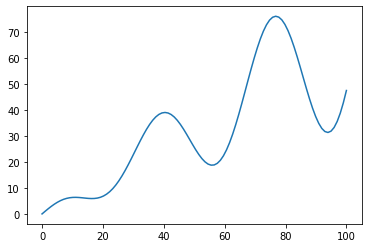

In [5]:
def representation(N=[0,100]):
    
    X = np.linspace(0,100,N)
    Y = f_x(X)
    sns.lineplot(x=X,y=Y)
    
    
representation(100)



## Créer une BD ```donnees``` de 600 données
- par application de ```donneesSimples(600 separation)```

In [6]:
data_base = donnesimple(600,separation)
#data_base = data_base.dropna(axis=0) # on songe a supprimer les valeurs manquantes
display(data_base.head())
type(data_base)

,abscisse,ordonnee,classe
0,98.025268,7.497144,A
1,81.468289,19.548304,A
2,67.583120,79.580886,B
3,74.051308,77.464902,B
4,64.777851,60.067066,B


pandas.core.frame.DataFrame

## Représenter la base de donnée graphiquement
Un scatterplot pour les points et un lineplot pour la séparation théorique donnent un graphique pertinent.

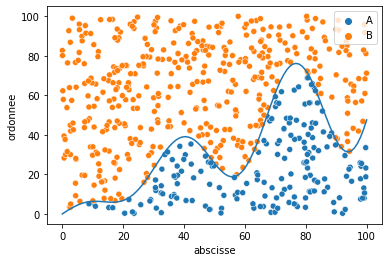

In [7]:
sns.scatterplot(x=data_base['abscisse'], y=data_base['ordonnee'],hue=data_base['classe'])
#sns.lineplot(x=data_base['abscisse'], y=data_base['classe'])
representation(100)

## En utilisant scikit-learn, séparer ```donnees``` en deux ensembles
Ecrire la fonction , fonction ```creerBases``` qui sépare la base de données en :
- apprentissage (et validation) : 50%
- validation et test 50%  
 
**NB** : dans ce TP, l'ensemble de test servira d'ensemble de validation.

**NB2** : à la fin de cette étape, on doit disposer de deux dataframes, un pour l'apprentissage, un pour validation/test

In [8]:
# on separe notre base de donner en deux une data_train et une data_test le tout diviser en 50%

def creerbase(data):
    X = data.iloc[:,-1]
    X_train,y_test = train_test_split(data_base, test_size = 0.5, train_size=0.5,random_state=1,stratify=X)
    return X_train,y_test

data_train,data_test = creerbase(data_base)

data_train


,abscisse,ordonnee,classe
564,55.498720,61.632096,B
47,54.091282,56.586351,B
592,74.901318,48.476565,A
459,94.198873,22.620801,A
17,4.337626,15.529908,B
...,...,...,...
138,38.621021,34.193856,A
415,63.312451,69.176031,B
284,59.270066,10.709230,A
302,60.579064,15.414594,A


In [9]:
#standariser une base

def stabilise(base):
    scalar = StandardScaler()
    scalar.fit(train_X) 
    train_X =scalar.transform(train_X)
    val_X = scalar.transform(float(str(val_y)))     



# Théorie et sa mise en pratique dans sklearn
- Rappeler le fonctionnement de la classification par knn
- Expliquer les variations proposées par 'algorithm'
- Expliquer l'influence de 'p' dans la distance de Minkowski (exemples à l'appui)
- Expliquer l'influence de 'weight' (exemples à l'appui)

**le fonctionnement de la classification par knn :**
    
    
    
ayant une base des donnée d'aprentissage  composé de n echantillons , la classification k-nn voisin consiste à attribuer à une nouvelle entrée la sortie majoritaire parmis les k selon une distance a definir, cet apprentissage utilise l'ensemble du model a chaque classification

**l'influence de p dans la distance de Minhowski**

il affecte la distance de facon a changer la forme du cercle unitaire en deux dimension et la distance euclidienne est un cas particulier de la distance de minkowki avec p=2

 **Expliquer l'influence de "weight"**
    
    



# Représenter la surface de séparation en fonction du nombre de voisins
## Fonction de coloration
Ecrire une fonction ```colorationPlan``` qui produit une représentation [0 ; 100]x[0 ; 100] colorée en fonction de la classe attribuée par votre classifieur.
en fonction de la classe attribuée par votre classifieur à chacun de ses points.
- Entrées : 
    - ```classifieur``` une fonction de classification (pour vérifier votre code, prenez un classifieur de votre choix dans sklearn)
    - ```NbPts``` nombre de points à prendre dans chaque direction pour discrétiser [0 ; 100]x[0 ; 100]

In [10]:
# A cause d'un Probleme de typage la focntion fit() du classifieur ne prend pas en entrer des string 
# Or notre classe{colonne} est un string Nomimal "A" et "B" alors je proceder a une conversion encoder afin de facilite le fit() du model

def conv (train_data):
    le = preprocessing.LabelEncoder()
    for i in range(300):
        if train_data['classe'].dtype == object:
            train_data['classe'] = le.fit_transform(train_data['classe'])
        else:
            pass
    return train_data

b = conv(data_train)
b

,abscisse,ordonnee,classe
564,55.498720,61.632096,1
47,54.091282,56.586351,1
592,74.901318,48.476565,0
459,94.198873,22.620801,0
17,4.337626,15.529908,1
...,...,...,...
138,38.621021,34.193856,0
415,63.312451,69.176031,1
284,59.270066,10.709230,0
302,60.579064,15.414594,0


In [11]:
# La fonction Classifieur prend en entrer un data_train (d'apprendtissage) et nous retourn un model entrainer

def classifieur(train_data):
    X = train_data.drop('classe',axis=1)
    y = train_data['classe']
    model_classif = KNeighborsClassifier(n_neighbors = 3)
    model_classif.fit(X,y)
    return model_classif

# cette fonction prend en entree une data_train et retourne un model classif 



## Observer et analyser l'influence du choix de 'k' sur la classification obtenue
Pour différentes valeurs de ```k``` dans le classifieur, utiliser la fonction ```colorationPlan``` et comparer les résultats.

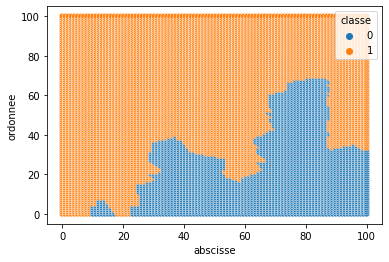

In [12]:
# Afin de coder notre fonction ColorationPlan etant complex a cause des parametre qui la
# compose je proceder de la sorte afin de faciliter la lecture et la representation 
# on a un test de K voisin don k = 3

def representationPlan(data):
    sns.scatterplot(x='abscisse', y='ordonnee', data=data, hue='classe')
    #sns.lineplot(np.linspace(0, 100, 40), f_x(np.linspace(0, 100, 40)))



def genere_nbts(nbPts):
    return pd.DataFrame([(x,y) for x in np.linspace(0, 100, nbPts) for y in np.linspace(0, 100, nbPts)], columns = ['abscisse', 'ordonnee'])
    
   
    
    
def colorationPlan ( classifieur , NPts):
    Pts= genere_nbts(NPts)
    Pts['classe']=classifieur.predict(Pts)
    #hue=Pts['classe']
    return representationPlan(Pts)
    
cl = classifieur(b)
colorationPlan(cl,100)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


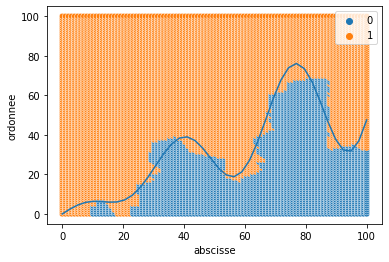

In [13]:
def representationPlan(data):
    sns.scatterplot(x='abscisse', y='ordonnee', data=data, hue='classe')
    sns.lineplot(np.linspace(0, 100, 40), f_x(np.linspace(0, 100, 40)))
cl = classifieur(b)
colorationPlan(cl,100)

## Commenter
- Essayer d'expliquer les résultats obtenus
- Entre deux résultats équivalents pour deux valeurs de 'k' différentes, lequel choisir ?

***Explication***:
Pour k=1, on remarquer que le résultat a une présicion parfaite. Ceci est dû au fait qu'on prédit l'ensemble d'entrainement, ainsi, le plus proche voisin est le point lui même. Alors que quand on augmente k les prédictions commence à être erroné surtout au voisinage de la fonction f. 

***Entre deux résultats équivalents***: pour deux valeurs de 'k' différentes, il est plus précis de considérer le plus grand k car si k=1 par exemple et que l'élement inconnu a un element B près de lui et 100 A un peu plus loin, alors 1-nn prédira B en ne regardant que localement. Mais si, par exemple, le plus grand k dépasse 70% de la taille de l'ensemble d'apprentissage, alors la classe prédite sera surement la classe majoritaire de l'ensemble d'apprentissage à chaque fois.

## Recherche des paramètres optimaux
- utiliser une gridsearch pour déterminer les meilleurs paramètres, expliquer la valeur de cv

**La valeur de cv** : 
    Le paramètre cv de gridSearch permettera de choisir 'k' pour les k-fold cross-validation qu'on va 
    effectuer pour trouver le nombre de voisins à considérer.
    pour chaque valeur de k dans k-nn, on va faire cv-fold cross-validation qui revient a diviser notre 
    l'ensemble d'apprentissage en cv parties égales et chaque partie jouera le rôle d'un élément dans 
    l'ensemble d'apprentissage cv-1 fois et jouera le rôle d'un élément dans l'ensemble de test une seule 
    fois. La moyenne des accuracy determinera l'accuracy de k-nn pour la valeur de k en cours.

In [14]:
def bestKnn(df, cv):
    param_grid=dict(n_neighbors=list(range(1, 21)))
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')
    grid.fit(df.drop('classe', axis=1), df['classe'])
    return grid.fit(df.drop('classe', axis=1), df['classe']) 

def bestKnn2(df, cv): # afin de tester la seconde fonction , je reecrsi la meme fonction et je change juste le return 
    param_grid=dict(n_neighbors=list(range(1, 21)))
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')
    grid.fit(df.drop('classe', axis=1), df['classe'])
    return grid.best_score_, grid.best_params_['n_neighbors']

def tuneSquareKnn(df, cv):
    bestAcc, bestK = bestKnn2(df, cv)
    print('bestAcc = '+str(bestAcc)+', bestK= '+str(bestK))
    
    return bestK

bb = tuneSquareKnn(b, 4)


bestAcc = 0.9466666666666667, bestK= 1


In [15]:
grid =bestKnn(b,5)
grid

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy')

In [16]:
grid.best_score_, grid.best_params_['n_neighbors']

(0.9466666666666667, 1)

In [17]:
grid.best_params_

{'n_neighbors': 1}

In [18]:
modelle = grid.best_estimator_

In [19]:
#testons ce model sur la data_test 
# on la convertir d'abord

b1 = conv(data_test)
modelle.score(b1.drop('classe', axis=1), b1['classe'])
    

0.94

# Représenter la matrice de confusion sur l'ensemble de validation

In [20]:
from sklearn.metrics import confusion_matrix

# Créer deux nouvelles bases d'apprentissage une de 100 données, une de 1000 données
- Observer l'influence de la quantité de données sur les valeurs optimales du paramètre 'k', expliquer
- Observer l'influence de la quantité de données sur la qualité du résultat obtenu, expliquer (faire attention à mesurer la qualité de l'apprentissage sur l'ensemble validation/test !)
- Observer l'influence de la quantité de données sur le temps de calcul, expliquer

*NB* : afin d'obtenir des résultats pertinents, il est nécessaire de relancer ce travil un certain nombre de fois afin d'en dégager une tendance statistique.

---
# Effet du bruit
Dans cette partie on va examiner la résistance au bruit de l'algorithme, et son influence sur le choix du nombre de voisins.
---
Cette étude a pour vocation de mieux comprendre le choix des paramètres lorsque certaines données sont incorrectes, ou lorsque le modèle contient des irrégularité non aisément modélisables (par exemple si la classe n'est pas totalement une fonction des entrées).

## Génération des données
Ecrire une fonction prenant en entrée un DataFrame 'T' servant à l'apprentissage et une probabilité $0\leq p\leq 1$ qui renvoie un nouveau dataframe qui est une copie de 'T', mais où la classe des exemples a été altérée avec la probabilité $p$ : pour chaque ligne du dataframe, la classe est inchangée avec la probabilité $1-p$, et modifiée avec la probabilité $p$.


## Analyser l'effet de la force du bruit sur les meilleurs paramètres du modèle
Représenter le nombre optimal de voisins à choisir en fonction de la valeur du paramètre $p$.

## Conclure, et vérifier l'effet sur les autres paramètres

---
# Influence des corrélations entre les attributs
---
On travaille à nouveau sur une base de données non bruitée. Ecrire une fonction prenant en entrée un DataFrame de même natyure que train ou test, et qui en renvoie une copie à laquelle on a ajouté 5 colonnes définies par :
- U1 :   $+300 \times X + 0.1 \times Y$
- U2 :   $-4000 \times X - 0.01 \times Y$
- U3 :   $-700 \times X + 0.12 \times Y$
- U4 :   $-280 \times X + 1.5 \times Y$
- U3 :   $+5100 \times X - 1.2 \times Y$  

NB : Remettre la colonne ```classe``` en dernière colonne.

In [21]:
def donneesDonnee(N, f):
    X = np.random.uniform(0, 100, size=N)
    y = np.random.uniform(0, 100, size=N)
    U1 = 300*X+0.1*y
    U2 = -4000*X-0.01*y
    U3 = -700*X+0.12*y
    U4 = -280*X+1.5*y
    U5 = 5100*X-1.2*y
    df = pd.DataFrame({'abscisse':X, 'ordonnee':y, 'U1': U1, 'U2':U2, 'U3':U3, 'U4':U4, 'U5':U5})
    df['classe'] = df.apply(lambda row: f(row['abscisse'], row['ordonnee']), axis=1)
    return df

donneesDonnee(100,separation)

,abscisse,ordonnee,U1,U2,U3,U4,U5,classe
0,44.172039,67.506563,13258.362315,-176688.830510,-30912.326415,-12266.911036,225196.390316,B
1,31.775150,15.151485,9534.060110,-127100.751001,-22240.786732,-8874.314737,162035.082563,A
2,98.148621,65.298359,29451.116131,-392595.136917,-68696.198885,-27383.666337,500479.608985,B
3,23.736830,79.262355,7128.975221,-94948.112434,-16606.269484,-6527.418855,120962.717933,B
4,85.362489,75.564476,25616.303165,-341450.711870,-59744.674602,-23788.150221,435258.016816,B
...,...,...,...,...,...,...,...,...
95,44.304126,47.357094,13295.973374,-177216.975769,-31007.205033,-12334.119513,225894.211790,B
96,26.629622,23.634443,7991.250055,-106518.724482,-18637.899291,-7420.842504,135782.711043,B
97,21.374701,72.614579,6419.671621,-85499.528326,-14953.576632,-5875.994284,108923.835284,B
98,96.541933,38.545385,28966.434432,-386168.117364,-67574.727638,-26973.923157,492317.603723,B


# Observer la diférence de qualité entre :
- Apprendre en utilisant toutes les observations (x, y, u1, u2, u3, u4, u5)
- Apprendre en n'utilisant que les observations (x,y)


## Expliquer la raison de la différence observée

## Utiliser un preprocessing adapté sur les données afin que la qualité obtenue en apprenant sur le jeu de données (x, y, u1, u2, u3, u4, u5) soit comparable à celle obtenue en n'utilisant que (x, y)

expliquer et pointer les limitations, proposer des améliorations


---
# Merci d'avoir suivi ce TP, j'espère qu'il vous a aidé à mieux appréhender l'utilisation de knn, et vous a permis de faire quelques pas dans le domaine *passionnant* de l'apprentissage artificiel